# Data Pre - Processing

Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFreame

In [7]:
df = pd.read_csv('covertype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Data cleaning

Checking features with nan value

In [3]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100, 5),  ' % missing values')

Handling Duplicates

In [4]:
df.duplicated().sum()

0

## Feature Engineering

### Type of Features

#### Numeric Features

In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numeric_features))

Number of numerical features:  55


### Categorical Features

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  0


### Discrete Features

In [7]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  45


### Continous Features

In [8]:
continous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Number of continous features: ', len(continous_features))

Number of continous features:  10


## Check outlier and Capping it

### Why Outliers?
- Data Entry Error: Human Error
- Measurement Error: Instrument Error
- Natural Error: It will be Real life data
- Intentional Error: People give wrong inputs

### Impact of Outliers?

- Outliers can very high impact on few ML models
- Can cause bias in the output

### Checking Outliers in Continous Features

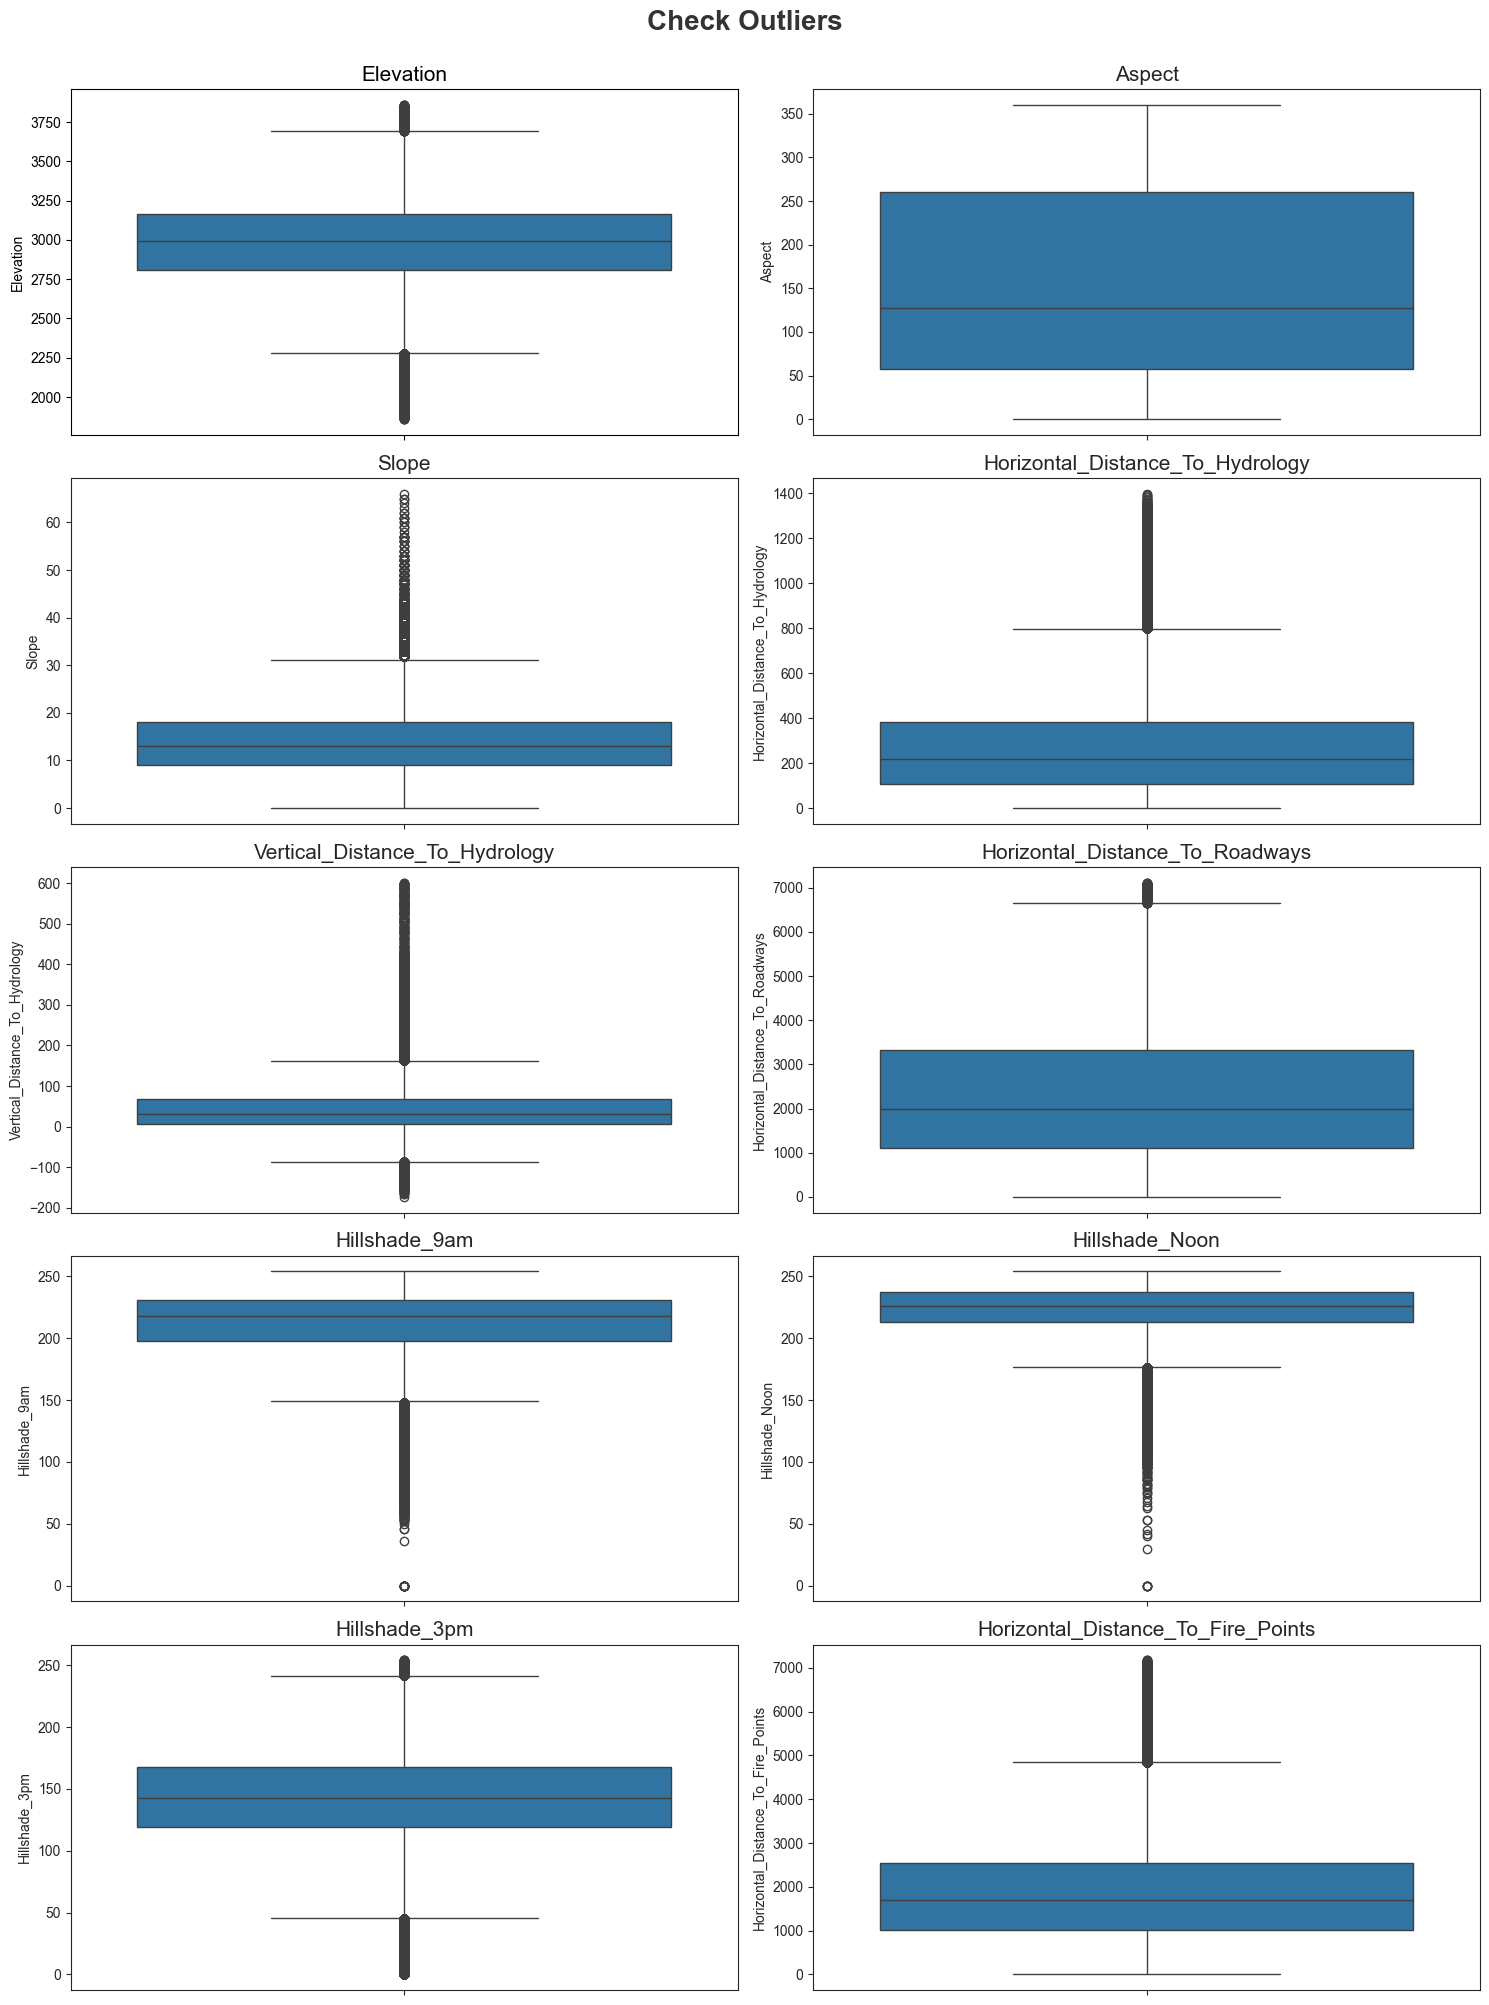

In [9]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20 , fontweight='bold', alpha=0.8, y=1.)
for i in range(len(continous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continous_features[i]])
    plt.title(continous_features[i], fontsize=15)
    plt.tight_layout()

## Insight
- Except "Aspect" rest all other 9 continous features have outliers

In [10]:
## Remove outliers based on IQR
df_copy = df.copy()
def detect_and_capping_outliers(col):
    # Finding the IQR
    IQR = df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25)
    upper_limit = df_copy[col].quantile(0.75) + (IQR * 1.5)
    lower_limit = df_copy[col].quantile(0.25) - (IQR * 1.5)
    df_copy.loc[(df_copy[col] > upper_limit), col] = upper_limit
    df_copy.loc[(df_copy[col] < lower_limit), col] = lower_limit
    return df_copy

In [11]:
for col in continous_features:
    detect_and_capping_outliers(col)

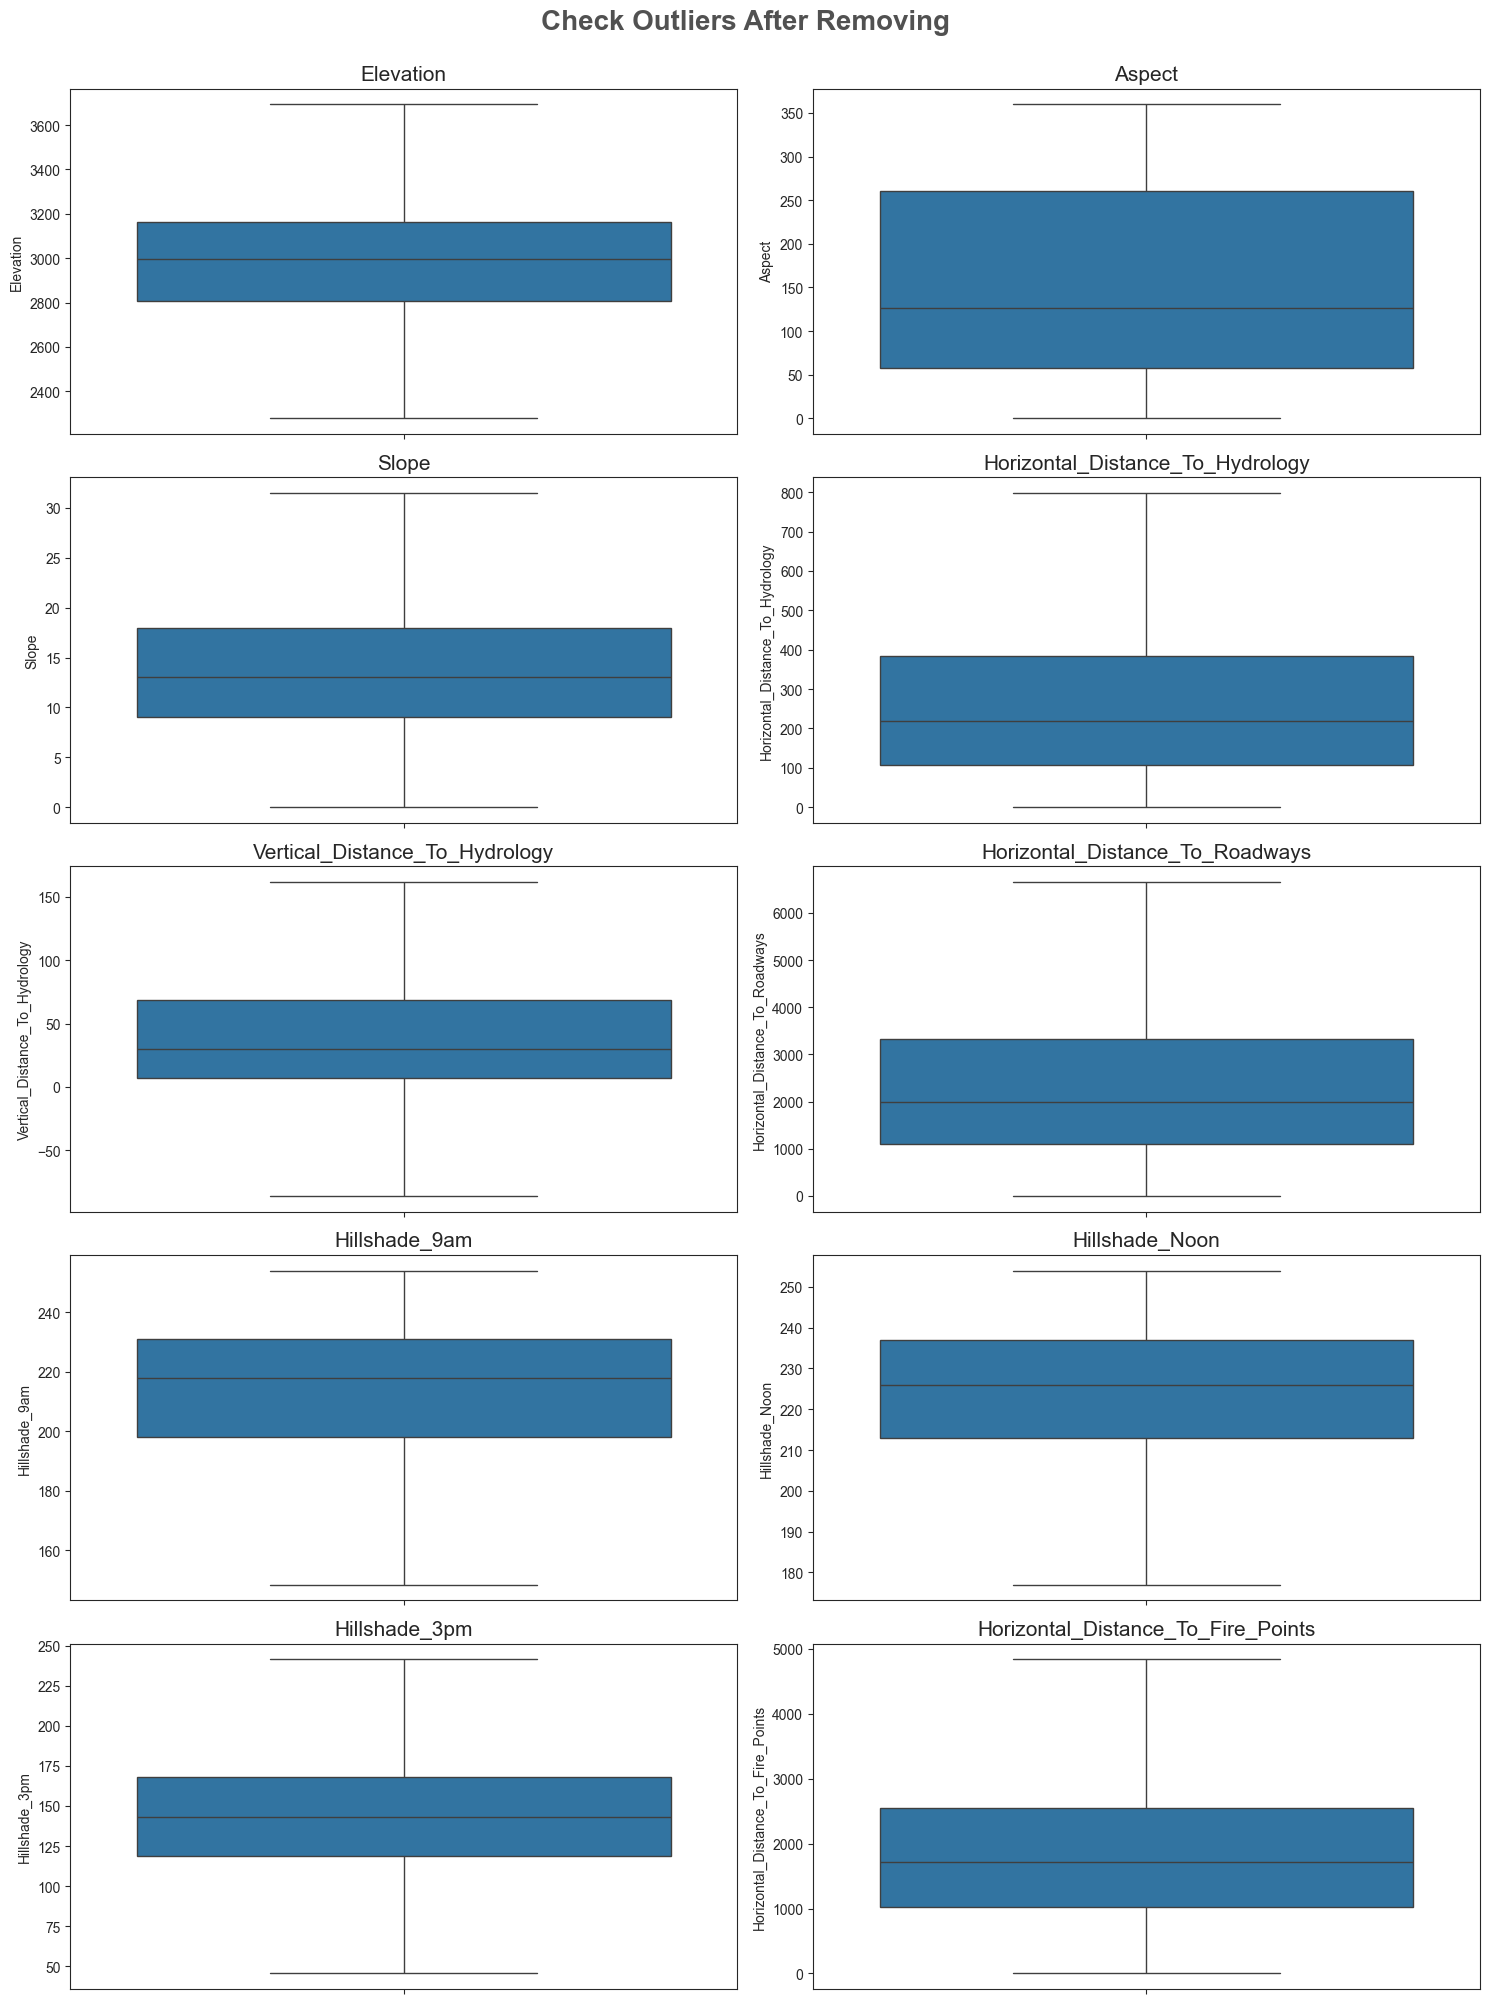

In [12]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers After Removing', fontsize=20 , fontweight='bold', alpha=0.8, y=1.)
for i in range(len(continous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df_copy[continous_features[i]])
    plt.title(continous_features[i], fontsize=15)
    plt.tight_layout()

Check column Names

In [13]:
df = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
 'Soil_Type40', 'Cover_Type']]

Create one column as Wilderness_Area_Type and represent it as categorical data

In [14]:
df["Wilderness_Area_Type"] = (df.iloc[:, 10:14] == 1).idxmax(1)
# list of wilderness areas
wilderness_areas = df["Wilderness_Area_Type"].unique().tolist()
wilderness_areas.sort()

In [15]:
wilderness_areas

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [16]:
def split_numbers_chars(row):
    """This function fetches the numerical characters at the end of a string
    and returns the alphanumeric characters and numerical characters respectively.

    Args:
        row (_type_): numeric or alphanumeric string

    """
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    """This function takes the start and end location of the one hot encoded column set and numeric column name to 
    be created and
    1. Transforms one-hot-encoded columns into one column consisting of column names with string data types
    2. Splits the string column into the alphanumeric and numeric characters
    3. Fetches numerical character and creates numeric column in the given dataframe

    Args:
        dataframe (_type_): _description_
        start_loc (_type_): _description_
        end_loc (_type_): _description_
        numeric_column_name (_type_): _description_
    """
    dataframe["String_Column"] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe["Tuple_Column"] = dataframe["String_Column"].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe["Tuple_Column"].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(["String_Column", "Tuple_Column"], axis=1, inplace=True)

### idxmax(1)
- Is a method used in pandas DataFrame or Series object to return the index of the first occurance of the maximum value along axis 1 (column)
- It returns the index of the first occurance of the maximum value. If multiple values eqauls the maximum , then the first row that matches the maximum value is returned

In [17]:
df.columns[14:54]

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [18]:
df_copy = df.copy()
reverse_one_hot_encode(df_copy, 14, 54, "Soil_Type")

In [19]:
feature_names = continous_features + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
all_features_df = df_copy[feature_names]
all_features_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,29,5


Handling Imbalanced Target Variable (Cover Type)

In [20]:
all_features_df["Cover_Type"]  = all_features_df["Cover_Type"] - 1

In [21]:
all_features_df["Cover_Type"].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

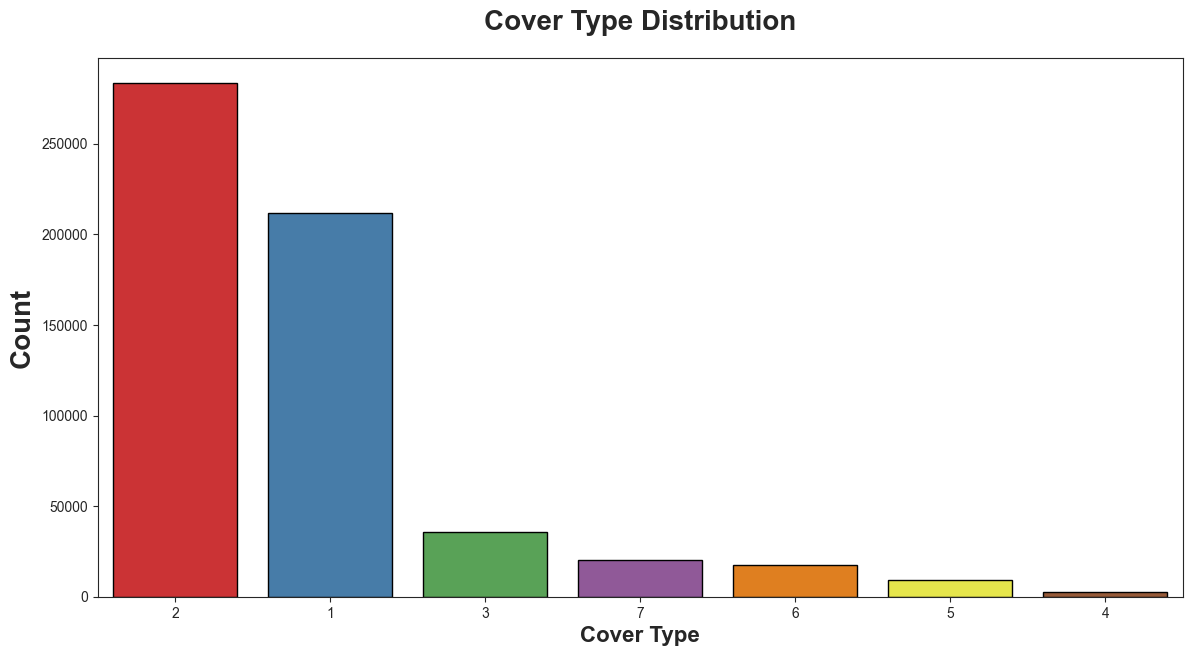

In [22]:
plt.subplots(figsize=(14, 7))
sns.countplot(x = 'Cover_Type', data = df , ec = 'black' , palette='Set1' , 
              order = df['Cover_Type'].value_counts().index)
plt.title('Cover Type Distribution', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Count', weight='bold' , fontsize=20)
plt.xlabel('Cover Type', weight='bold' , fontsize=16)
plt.show()

Inference
- Most of the data is of class 1 and class 2 type
- So its clear case of imbalanced data

In [23]:
def split_and_scale_df(df):
    """This function splits the dataframe into features and target variable and scales the features

    Args:
        df (_type_): dataframe to be split and scaled

    Returns:
        X_train: dataframe of features for training
        X_test: dataframe of features for testing
        y_train: target variable for training
        y_test: target variable for testing
    """
    X = df.drop("Cover_Type", axis=1)
    y = df["Cover_Type"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [24]:
def evaluate_model(model, balanced_class , X_test , y_test):
    """This function evaluates the model using the test data

    Args:
        model (_type_): model to be evaluated
        X_test (_type_): features for testing
        y_test (_type_): target variable for testing
    """
    model_accuracy = model.score(X_test, y_test)
    print(f"Accuracy({balanced_class}): {model_accuracy*100:.2f}%")
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cl_report = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print("Classification Report", cl_report)
    return model_accuracy

In [25]:
imbalanced_data = all_features_df.copy()
X_train, X_test, y_train, y_test = split_and_scale_df(imbalanced_data)

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy(Imbalanced): 95.92%


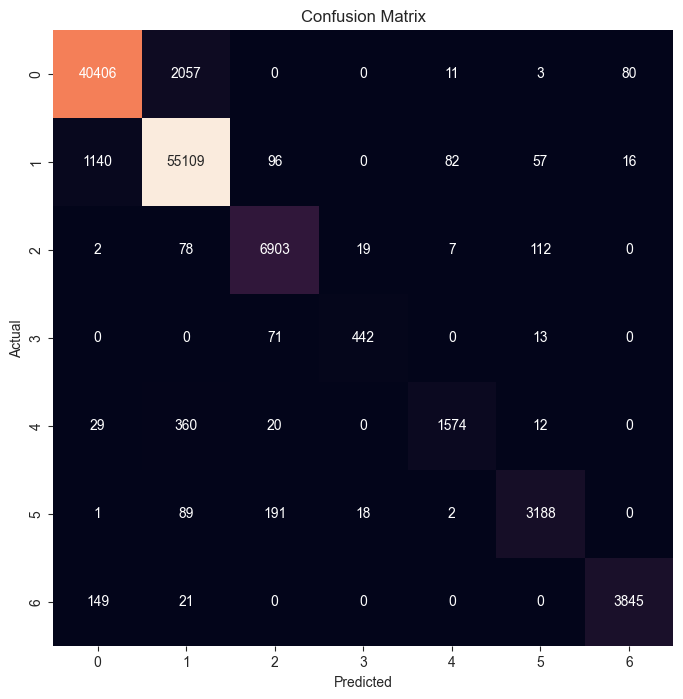

Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.98      0.97     56500
           2       0.95      0.97      0.96      7121
           3       0.92      0.84      0.88       526
           4       0.94      0.79      0.86      1995
           5       0.94      0.91      0.93      3489
           6       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



0.9592437372529109

In [26]:
evaluate_model(model_1, "Imbalanced", X_test, y_test)

Accuracy(Imbalanced): 71.52%


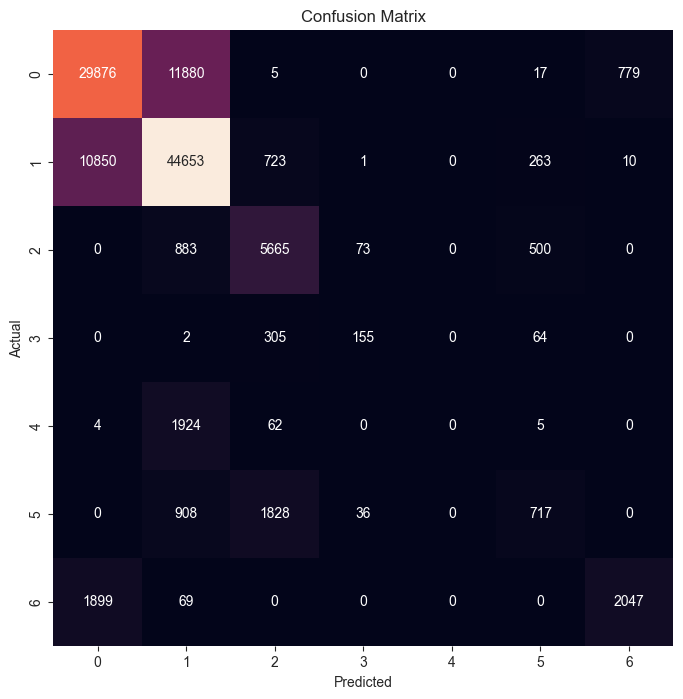

Classification Report               precision    recall  f1-score   support

           0       0.70      0.70      0.70     42557
           1       0.74      0.79      0.76     56500
           2       0.66      0.80      0.72      7121
           3       0.58      0.29      0.39       526
           4       0.00      0.00      0.00      1995
           5       0.46      0.21      0.28      3489
           6       0.72      0.51      0.60      4015

    accuracy                           0.72    116203
   macro avg       0.55      0.47      0.49    116203
weighted avg       0.70      0.72      0.70    116203



0.7152397098181631

In [27]:
model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train)
evaluate_model(model_2, "Imbalanced", X_test, y_test)

In [28]:
y_pred_probabilites = model_2.predict_proba(X_test)
y_pred_probabilites

array([[5.30867889e-01, 4.38659631e-01, 3.54954071e-10, ...,
        5.39830510e-04, 4.86078831e-10, 2.99326480e-02],
       [4.23534951e-02, 8.64909196e-01, 3.08747672e-03, ...,
        6.63990021e-02, 2.32144910e-02, 9.95319176e-06],
       [1.29474919e-02, 4.94031477e-01, 1.53931678e-01, ...,
        3.39245821e-02, 3.05041102e-01, 1.69561026e-08],
       ...,
       [1.27506876e-01, 8.59080582e-01, 3.43802948e-07, ...,
        1.33266843e-02, 1.37248935e-06, 4.88753486e-05],
       [1.24560041e-01, 8.72099173e-01, 5.12395526e-07, ...,
        3.12388456e-03, 7.98453767e-07, 7.59614177e-05],
       [2.30085174e-01, 7.35951687e-02, 1.01997245e-08, ...,
        1.23195392e-04, 2.44754130e-07, 6.96196205e-01]])

Inference
- Form the above confusion matrix we can observe that most of the true positives and true negatives are for class 1 and 2 only.
- We have huge disconnection between over represented classes and under represented classes

### 1. Random Under-sampling
- It consists of removing samples from the majority class(under-sampling)

In [29]:
under_sampled_data = all_features_df.copy()
under_sampled_data["Cover_Type"].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

In [30]:
minimum_class_size = under_sampled_data["Cover_Type"].value_counts().min()
print(f"Size of the smallest cl: {minimum_class_size}")

Size of the smallest cl: 2747


In [31]:
class_subsets = [under_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]
class_subsets[0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type
40,2699,347,3,0,0,2096,213,234,159,6853,1,0,0,0,20,0
51,2739,323,25,85,43,3118,149,205,192,6219,1,0,0,0,29,0
52,2696,72,2,30,0,3271,222,234,149,6071,1,0,0,0,30,0
55,2722,315,24,30,19,3216,148,212,200,6132,1,0,0,0,16,0
67,2919,13,13,90,6,5321,207,214,142,4060,1,0,0,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565432,2826,72,14,67,13,2984,235,213,106,2082,0,0,1,0,24,0
565433,2820,69,14,42,7,2954,234,211,106,2065,0,0,1,0,24,0
565434,2812,67,16,30,0,2925,234,206,99,2047,0,0,1,0,24,0
565527,2832,45,17,85,19,2989,222,200,106,2058,0,0,1,0,24,0


## Undersample the majority class
- We will go through the each class subsets and sample 2747 records

In [32]:
class_subsets = [under_sampled_data.query(
    "Cover_Type == " + str(i)) for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(minimum_class_size)
under_sampled_data = pd.concat(class_subsets).sample(frac=1.0).reset_index(drop=True)
    

In [33]:
under_sampled_data["Cover_Type"].value_counts()

Cover_Type
4    2747
6    2747
2    2747
1    2747
0    2747
5    2747
3    2747
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = split_and_scale_df(under_sampled_data)
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy(UnderSampling): 87.26%


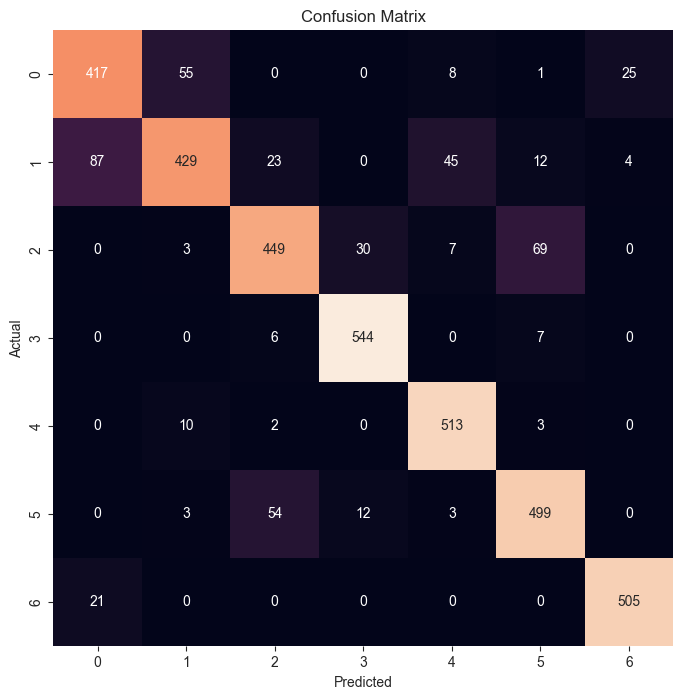

Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.81       506
           1       0.86      0.71      0.78       600
           2       0.84      0.80      0.82       558
           3       0.93      0.98      0.95       557
           4       0.89      0.97      0.93       528
           5       0.84      0.87      0.86       571
           6       0.95      0.96      0.95       526

    accuracy                           0.87      3846
   macro avg       0.87      0.88      0.87      3846
weighted avg       0.87      0.87      0.87      3846



0.8725949037961519

In [35]:
evaluate_model(model_1, "UnderSampling", X_test, y_test)

## 2. Random Over-sampling
It consists of adding more examples from the minority class(over-sampling)

In [36]:
over_sampled_data = all_features_df.copy()
maximum_class_size = np.max(over_sampled_data["Cover_Type"].value_counts().values)
print(f"Size of the largest class: {maximum_class_size}")

Size of the largest class: 283301


### Oversampling the minority class
- We will go through each subsets and sample 2747 records

In [37]:
class_subsets = [over_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(maximum_class_size, replace=True, random_state=42)
over_sampled_data = pd.concat(class_subsets).sample(frac=1.0, random_state=42).reset_index(drop=True)

In [38]:
over_sampled_data["Cover_Type"].value_counts()

Cover_Type
2    283301
6    283301
0    283301
1    283301
4    283301
5    283301
3    283301
Name: count, dtype: int64

Accuracy(OverSampling): 99.53%


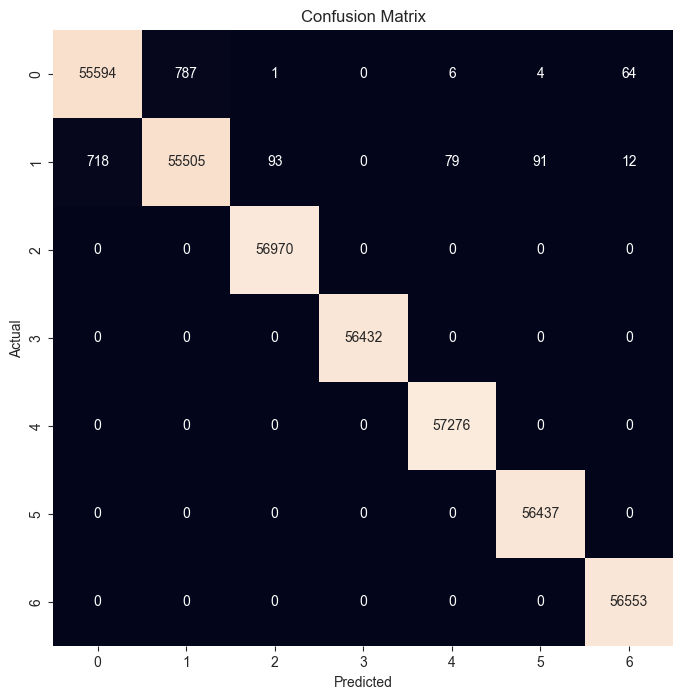

Classification Report               precision    recall  f1-score   support

           0       0.99      0.98      0.99     56456
           1       0.99      0.98      0.98     56498
           2       1.00      1.00      1.00     56970
           3       1.00      1.00      1.00     56432
           4       1.00      1.00      1.00     57276
           5       1.00      1.00      1.00     56437
           6       1.00      1.00      1.00     56553

    accuracy                           1.00    396622
   macro avg       1.00      1.00      1.00    396622
weighted avg       1.00      1.00      1.00    396622



0.9953230027582938

In [39]:
X_train, X_test, y_train, y_test = split_and_scale_df(over_sampled_data)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
evaluate_model(rf_classifier, "OverSampling", X_test, y_test)

In [40]:
imbalanced_data = all_features_df.copy()
X_train, X_test, y_train, y_test = split_and_scale_df(imbalanced_data)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In order to calculate roc_auc_score in multi class classification we need to mention strategies either as OvR and OvO strategies

ROC AUC: 0.9983598034178846
Accuracy(Imbalanced): 95.92%


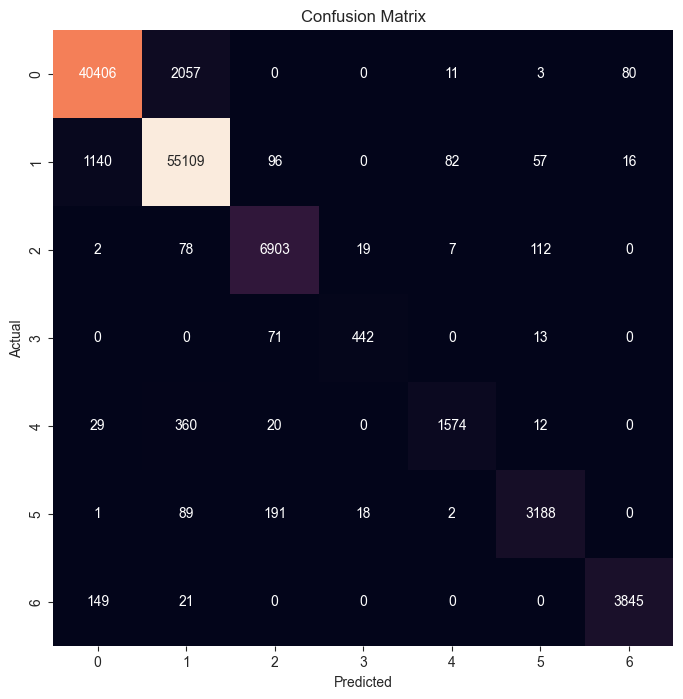

Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.98      0.97     56500
           2       0.95      0.97      0.96      7121
           3       0.92      0.84      0.88       526
           4       0.94      0.79      0.86      1995
           5       0.94      0.91      0.93      3489
           6       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [42]:
# Make predictions
y_pred_probabilites = rf_classifier.predict_proba(X_test)
rf_roc_auc = roc_auc_score(y_test, y_pred_probabilites, multi_class='ovr') # Calculate ROC AUC
print(f"ROC AUC: {rf_roc_auc}")
rf_accuracy = evaluate_model(rf_classifier, "Imbalanced", X_test, y_test)


Extra Trees (Random Forest) Classifier

ROC AUC: 0.998279676006552
Accuracy(Imbalanced): 95.86%


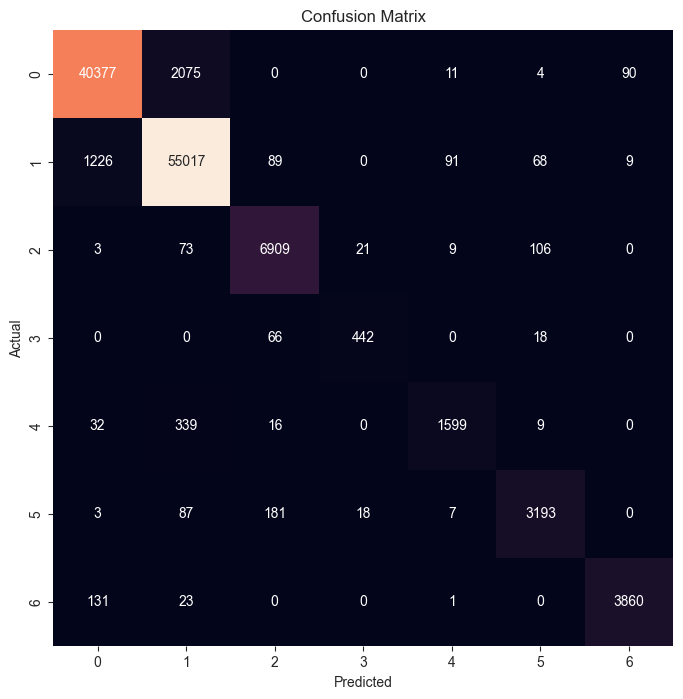

Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.97      0.96     56500
           2       0.95      0.97      0.96      7121
           3       0.92      0.84      0.88       526
           4       0.93      0.80      0.86      1995
           5       0.94      0.92      0.93      3489
           6       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.92      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [43]:
xrf_classifier = ExtraTreesClassifier(random_state=42)
xrf_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilites = xrf_classifier.predict_proba(X_test)
xrf_roc_auc = roc_auc_score(y_test, y_pred_probabilites, multi_class='ovr') # Calculate ROC AUC
print(f"ROC AUC: {xrf_roc_auc}")
xrf_accuracy = evaluate_model(xrf_classifier, "Imbalanced", X_test, y_test)

Light Gradient Boosting Machine (LightGBM) classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 15
[LightGBM] [Info] Start training from score -1.010055
[LightGBM] [Info] Start training from score -0.717554
[LightGBM] [Info] Start training from score -2.787067
[LightGBM] [Info] Start training from score -5.343669
[LightGBM] [Info] Start training from score -4.126990
[LightGBM] [Info] Start training from score -3.511322
[LightGBM] [Info] Start training from score -3.338569
ROC AUC: 0.9714801213185537
Accuracy(Imbalanced): 84.97%


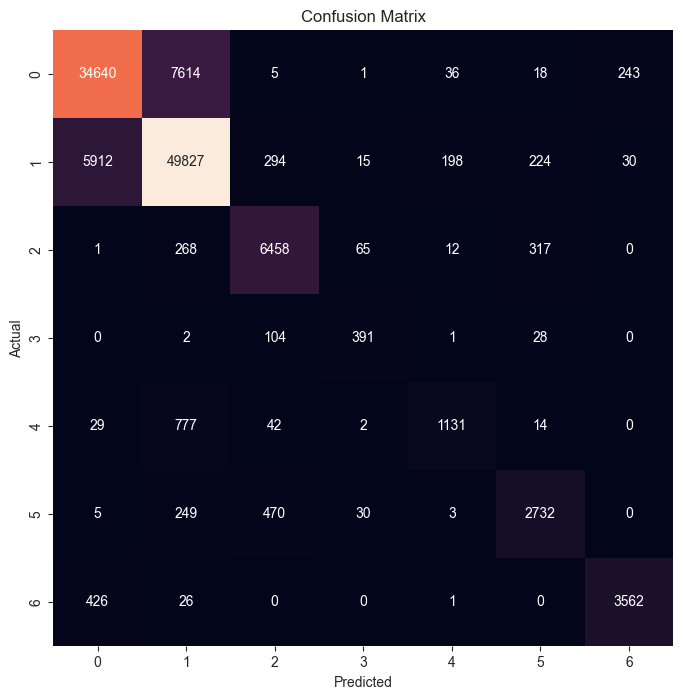

Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.83     42557
           1       0.85      0.88      0.86     56500
           2       0.88      0.91      0.89      7121
           3       0.78      0.74      0.76       526
           4       0.82      0.57      0.67      1995
           5       0.82      0.78      0.80      3489
           6       0.93      0.89      0.91      4015

    accuracy                           0.85    116203
   macro avg       0.84      0.80      0.82    116203
weighted avg       0.85      0.85      0.85    116203



In [44]:
# Create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilites = lgbm_classifier.predict_proba(X_test)
lgbm_roc_auc = roc_auc_score(y_test, y_pred_probabilites, multi_class='ovr') # Calculate ROC AUC
print(f"ROC AUC: {lgbm_roc_auc}")
lgbm_accuracy = evaluate_model(lgbm_classifier, "Imbalanced", X_test, y_test)

CatBoost Classifier

ROC AUC: 0.9890452070525619
Accuracy(Imbalanced): 88.65%


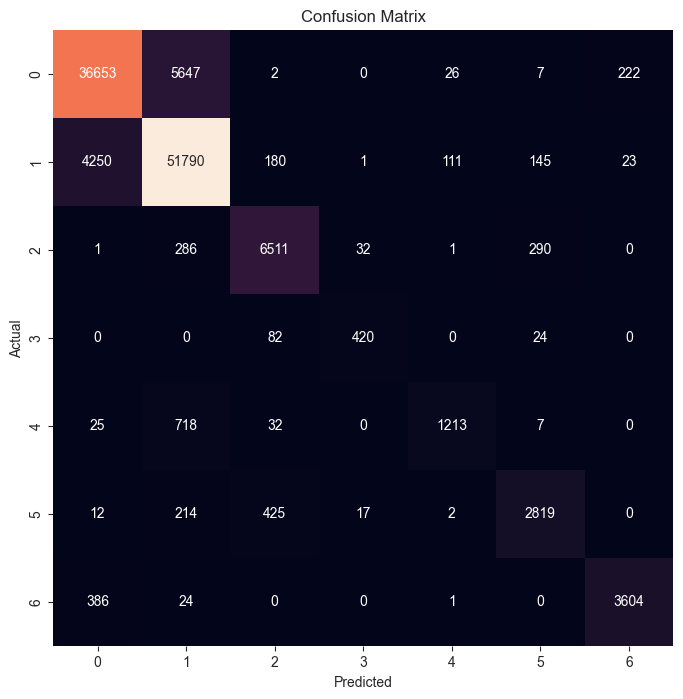

Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.87     42557
           1       0.88      0.92      0.90     56500
           2       0.90      0.91      0.91      7121
           3       0.89      0.80      0.84       526
           4       0.90      0.61      0.72      1995
           5       0.86      0.81      0.83      3489
           6       0.94      0.90      0.92      4015

    accuracy                           0.89    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.89      0.89      0.89    116203



In [45]:
# create model apply fit evaluate model
cat_classifier = CatBoostClassifier(random_state=42, verbose=False)
cat_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilites = cat_classifier.predict_proba(X_test)
cat_roc_auc = roc_auc_score(y_test, y_pred_probabilites, multi_class='ovr') # Calculate ROC AUC
print(f"ROC AUC: {cat_roc_auc}")
cat_accuracy = evaluate_model(cat_classifier, "Imbalanced", X_test, y_test)

XgBoost Classifier

ROC AUC: 0.9873254785203814
Accuracy(Imbalanced): 87.48%


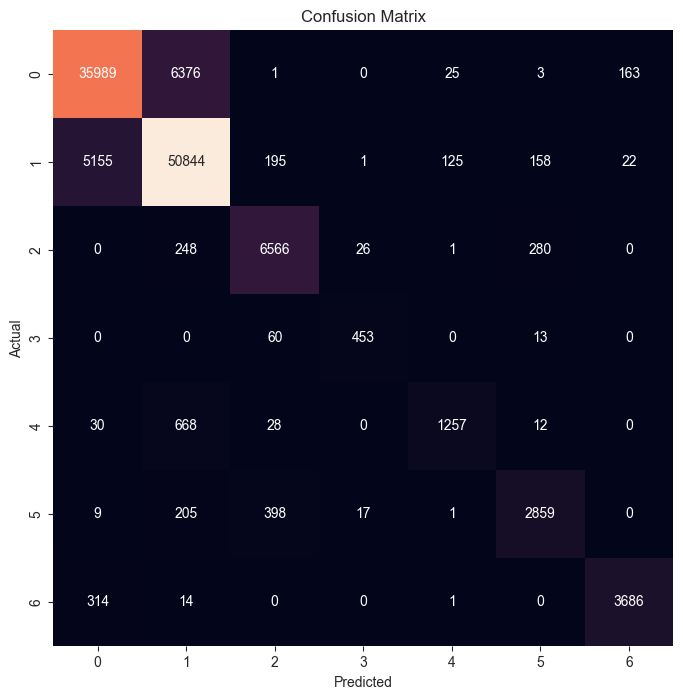

Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86     42557
           1       0.87      0.90      0.89     56500
           2       0.91      0.92      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.63      0.74      1995
           5       0.86      0.82      0.84      3489
           6       0.95      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.84      0.86    116203
weighted avg       0.87      0.87      0.87    116203



In [46]:
# Create model apply fit_evaluate_model
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilites = xgb_classifier.predict_proba(X_test)
xgb_roc_auc = roc_auc_score(y_test, y_pred_probabilites, multi_class='ovr') # Calculate ROC AUC
print(f"ROC AUC: {xgb_roc_auc}")
xgb_accuracy = evaluate_model(xgb_classifier, "Imbalanced", X_test, y_test)

## Evaluate all base Models

Text(0.5, 1.0, 'Accuracy Score of Different Models')

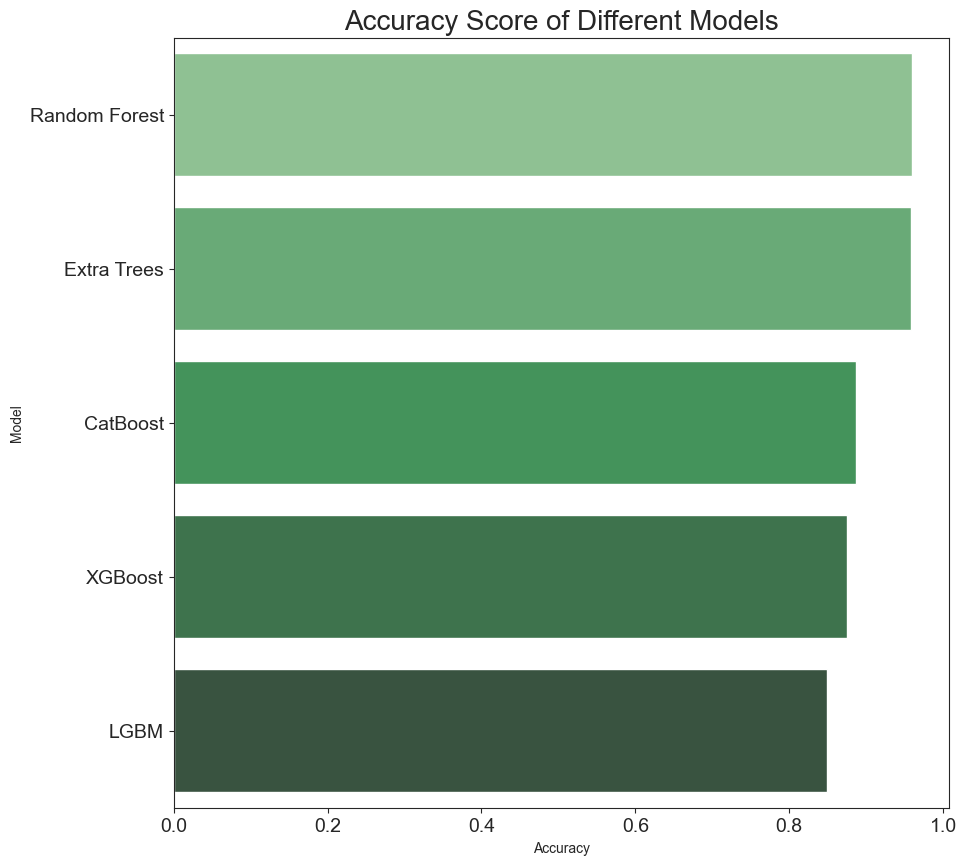

In [47]:
# Create dataframe of accuracies and model and sort values
performance_comparison = pd.DataFrame({"Model": ["Random Forest", "Extra Trees", "LGBM", "CatBoost", "XGBoost"],
                                        "Accuracy": [rf_accuracy, xrf_accuracy, lgbm_accuracy, cat_accuracy, xgb_accuracy],
                                        "ROC_AUC": [rf_roc_auc, xrf_roc_auc, lgbm_roc_auc, cat_roc_auc, xgb_roc_auc]})
performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# set the plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# Set the title and arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=20)

Plot ROC AUC CURVE

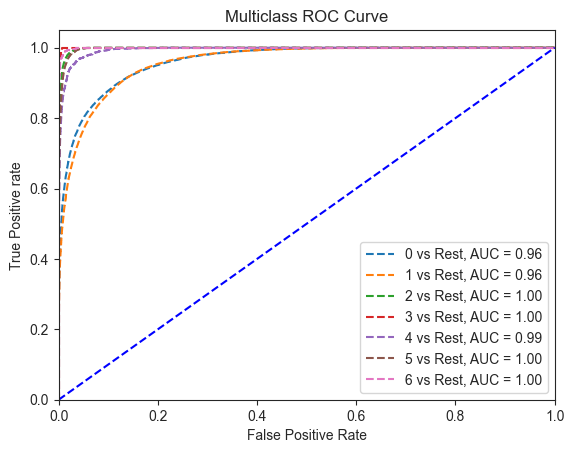

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# roc curve for classes
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()

n_classes = 7

for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_probabilites[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label = "%s vs Rest, AUC = %.2f" % (classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')
plt.show()    
    

## Best model is Random Forest Classifier with 96% Accuracy,  hence we can  save this model

In [49]:
import pickle
# Save the trained model as a pickle string.
pickle.dump(rf_classifier, open("rf_classifier.pkl", "wb"))